#**Keystroke Dynamics on Mobile Devices Varying with Time**




###Importing required libraries

In [ ]:
#import required libraries
import os
import pandas as pd
import numpy as np
import datetime
import pytz
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates


**Required Functions**

In [ ]:
# pickle functions
#for reading pickle file
def read_pickle(filename, path='/content/drive/My Drive/Practicum/Pickle/'):
  sct = datetime.datetime.now()
  print("Start Pickle Load time: {0}".format(sct))
  with open(path + filename, 'rb') as file:
     unpickler = pickle.Unpickler(file)
     df = pickle.load(file)
  ct = datetime.datetime.now()
  print("End Pickle Load time: {0}   Duration:{1}".format(ct, ct-sct))
  return df
  
#to write into a pickle file
def write_pickle(df,filename, path='/content/drive/My Drive/Practicum/Pickle/'):
  sct = datetime.datetime.now()
  print("Start Pickle Load time: {0}".format(sct))
  with open(path + filename, 'wb') as file:
    pickle.dump(pd.DataFrame(df), file)
  ct = datetime.datetime.now()
  print("End Pickle Load time: {0}   Duration:{1}".format(ct, ct-sct))


In [ ]:
#The funcion will check the geo location and convert the time to corrresponding time in the geographic location
def getLocalDateTime(df) :    
    time_zone = df['time_zone']
    utc_timestamp=df['utc_timestamp']    
    if (time_zone == 'Europe/Dublin') :
        return utc_timestamp.tz_convert('Europe/Dublin')
    elif (time_zone == 'Asia/Riyadh') :
        return utc_timestamp.tz_convert('Asia/Riyadh')
    elif (time_zone == 'Asia/Dubai') :
        return utc_timestamp.tz_convert('Asia/Dubai')    
    elif (time_zone == 'Asia/Kolkata') :
        return utc_timestamp.tz_convert('Asia/Kolkata')

In [ ]:
#function to get different time slot
def getTimeSlot(event_time):
  if event_time in range(8,12):
    return 'Morning'
  elif event_time in range(12,15):
    return 'Noon'
  elif event_time in range(15,18):
    return 'After Noon'
  elif event_time in range(18,21):
    return 'Dinner'
  elif event_time in range(21,24):
    return 'Evening'
  elif event_time in range(0,8):
    return 'Night'

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# mounting a specific directory on my google drive for data storage and retrieval
os.chdir("/content/drive/My Drive/Practicum/")
!ls


Mounted at /content/drive
'Colab Notebooks'
 CSV
 Dailywise_DwellTime_FlightTime.jpeg
 db_backups
 Ethics-Notification-Form-Computing-November-2020.docx
'Language Logger -Logging Details.pptx'
'Manual for set up language logger app backend application on windows.gdoc'
 Month_DwellTime_FlightTime.jpeg
 Pickle
 plotly_gantt_chart-main
 reseachIMELogging.html
 reseachIMELogging.mp4
 ResearchIME
 Timeslot_DwellTime_FlightTime.jpeg
 WeekDays_DwellTime_FlightTime.jpeg


In [ ]:
#read user details from user table
df_user = pd.read_csv("CSV/user_26_07_2021.csv")
#convert epoc time to normal time
df_user['registration_timestamp']=pd.to_datetime(df_user['registration_timestamp'],unit='ms')
#df_event.describe
df_user=df_user.sort_values(by="registration_timestamp", ascending=True).reset_index()
df_user
#rename uuid as user_uuid
df_user.rename(columns = {'uuid' :'user_uuid',}, inplace = True)
df_user


,index,user_uuid,registration_timestamp
0,12,ae80cf27-4366-412a-a8ac-c8430584bfbf,2021-02-02 01:40:00
1,2,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00
2,14,f2433e01-2cc2-406d-b1b5-681e70f129df,2021-02-02 10:00:00
3,13,e802576c-b731-4e60-b92d-700f2503b822,2021-02-02 12:46:40
4,11,840552bc-bab5-40bd-9a92-9308e5f32543,2021-02-02 15:33:20
5,7,3be4af41-4349-41cf-9c77-fbdb0d12ba86,2021-02-03 11:00:00
6,9,46952d51-25ad-405a-ac11-a22a624ae6b5,2021-02-03 11:00:00
7,4,177fa0fa-b181-4acd-9783-891e51749da9,2021-06-10 13:00:00
8,3,0c758b6e-548e-4a2b-b02c-7af01931c7b1,2021-06-10 15:46:40
9,8,4669d044-8174-404a-b71a-6e1054d1455a,2021-06-10 15:46:40


In [ ]:
#assign username based on registration time
user_no=0;
df_user['user_name']=''
df_len=len(df_user)
for i in range(df_len) : 
     user_no+= 1 
     #assign event id
     df_user.loc[i,'user_name']="user"+str(user_no)  
df_user


,index,user_uuid,registration_timestamp,user_name
0,12,ae80cf27-4366-412a-a8ac-c8430584bfbf,2021-02-02 01:40:00,user1
1,2,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,user2
2,14,f2433e01-2cc2-406d-b1b5-681e70f129df,2021-02-02 10:00:00,user3
3,13,e802576c-b731-4e60-b92d-700f2503b822,2021-02-02 12:46:40,user4
4,11,840552bc-bab5-40bd-9a92-9308e5f32543,2021-02-02 15:33:20,user5
5,7,3be4af41-4349-41cf-9c77-fbdb0d12ba86,2021-02-03 11:00:00,user6
6,9,46952d51-25ad-405a-ac11-a22a624ae6b5,2021-02-03 11:00:00,user7
7,4,177fa0fa-b181-4acd-9783-891e51749da9,2021-06-10 13:00:00,user8
8,3,0c758b6e-548e-4a2b-b02c-7af01931c7b1,2021-06-10 15:46:40,user9
9,8,4669d044-8174-404a-b71a-6e1054d1455a,2021-06-10 15:46:40,user10


In [ ]:
#drop irrelevent columns
df_user=df_user.drop(['index','registration_timestamp'],axis=1)


In [ ]:
#add timezone and UTC offset in hh:mm to each user
df_user['time_zone']=''
df_user['country_code']=''
df_len=len(df_user)
for i in range(df_len) : 
  if (df_user.loc[i,'user_uuid']=='0a78bf07-81a2-4b62-9221-74c682007fbc'):
    df_user.loc[i,'country_code']='IE'  	   
    df_user.loc[i,'time_zone']='Europe/Dublin'        
  elif (df_user.loc[i,'user_uuid']=='2b028d53-b61b-4fce-b5f3-0eb58336ee02'):	
    df_user.loc[i,'country_code']='SA'
    df_user.loc[i,'time_zone']='Asia/Riyadh'     
  elif (df_user.loc[i,'user_uuid']=='46952d51-25ad-405a-ac11-a22a624ae6b5'):	
    df_user.loc[i,'country_code']='AE'
    df_user.loc[i,'time_zone']='Asia/Dubai'     
  else:	
   df_user.loc[i,'country_code']='IN'
   df_user.loc[i,'time_zone']='Asia/Kolkata'
     
df_user

,user_uuid,user_name,time_zone,country_code
0,ae80cf27-4366-412a-a8ac-c8430584bfbf,user1,Asia/Kolkata,IN
1,0a78bf07-81a2-4b62-9221-74c682007fbc,user2,Europe/Dublin,IE
2,f2433e01-2cc2-406d-b1b5-681e70f129df,user3,Asia/Kolkata,IN
3,e802576c-b731-4e60-b92d-700f2503b822,user4,Asia/Kolkata,IN
4,840552bc-bab5-40bd-9a92-9308e5f32543,user5,Asia/Kolkata,IN
5,3be4af41-4349-41cf-9c77-fbdb0d12ba86,user6,Asia/Kolkata,IN
6,46952d51-25ad-405a-ac11-a22a624ae6b5,user7,Asia/Dubai,AE
7,177fa0fa-b181-4acd-9783-891e51749da9,user8,Asia/Kolkata,IN
8,0c758b6e-548e-4a2b-b02c-7af01931c7b1,user9,Asia/Kolkata,IN
9,4669d044-8174-404a-b71a-6e1054d1455a,user10,Asia/Kolkata,IN


In [ ]:
#read event table data with specific columns 
col_list = ["user_uuid", "timestamp","type"]
df_event = pd.read_csv("CSV/event_26_07_2021.csv", usecols=col_list)
df_event

,type,user_uuid,timestamp
0,TOUCH_DOWN,f783f4de-9669-4f78-b765-b9f0d3e68b02,1612258965957
1,TOUCH_UP,f783f4de-9669-4f78-b765-b9f0d3e68b02,1612258966077
2,TOUCH_DOWN,f783f4de-9669-4f78-b765-b9f0d3e68b02,1612258966126
3,TOUCH_UP,f783f4de-9669-4f78-b765-b9f0d3e68b02,1612258966233
4,TOUCH_DOWN,f783f4de-9669-4f78-b765-b9f0d3e68b02,1612259002051
...,...,...,...
715685,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1627335365019
715686,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1627335365154
715687,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1627335365235
715688,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1627335366038


In [ ]:
#remove less active user #activedays=1
df_event=df_event[~df_event.user_uuid.isin(['f783f4de-9669-4f78-b765-b9f0d3e68b02'])]
df_event

,type,user_uuid,timestamp
93,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263445371
94,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263445373
95,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263481400
96,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263481460
97,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1612263482243
...,...,...,...
715685,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1627335365019
715686,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1627335365154
715687,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1627335365235
715688,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1627335366038


In [ ]:
#convert epoc to human readable date time in millisec with utc time format
df_event['timestamp'] = pd.to_datetime(df_event['timestamp'],unit='ms',utc=True) #change column to datetime format
df_event

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,type,user_uuid,timestamp
93,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:57:25.371000+00:00
94,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:57:25.373000+00:00
95,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:01.400000+00:00
96,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:01.460000+00:00
97,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243000+00:00
...,...,...,...
715685,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:05.019000+00:00
715686,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:05.154000+00:00
715687,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:05.235000+00:00
715688,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 21:36:06.038000+00:00


In [ ]:
#rename column name 'type' to 'event_type' 
df_event.rename(columns = {'timestamp' :'utc_timestamp','type' :'event_type'}, inplace = True)
df_event.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,event_type,user_uuid,utc_timestamp
93,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:57:25.371000+00:00
94,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:57:25.373000+00:00
95,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:01.400000+00:00
96,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:01.460000+00:00
97,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243000+00:00
98,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.301000+00:00
99,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.233000+00:00
100,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.258000+00:00
101,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.597000+00:00
102,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:03.624000+00:00


In [ ]:
#join dataframes such as df_uname and df_event_new
df_event = df_event.merge(df_user,on='user_uuid',how='inner').reset_index(drop=True)
df_event

,event_type,user_uuid,utc_timestamp,user_name,time_zone,country_code
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:57:25.371000+00:00,user2,Europe/Dublin,IE
1,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:57:25.373000+00:00,user2,Europe/Dublin,IE
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:01.400000+00:00,user2,Europe/Dublin,IE
3,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:01.460000+00:00,user2,Europe/Dublin,IE
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:58:02.243000+00:00,user2,Europe/Dublin,IE
...,...,...,...,...,...,...
715592,TOUCH_UP,0a787ab7-ad24-4523-9345-3b572aba73b1,2021-07-26 17:24:57.707000+00:00,user15,Asia/Kolkata,IN
715593,TOUCH_DOWN,0a787ab7-ad24-4523-9345-3b572aba73b1,2021-07-26 17:24:57.987000+00:00,user15,Asia/Kolkata,IN
715594,TOUCH_UP,0a787ab7-ad24-4523-9345-3b572aba73b1,2021-07-26 17:24:58.071000+00:00,user15,Asia/Kolkata,IN
715595,TOUCH_DOWN,0a787ab7-ad24-4523-9345-3b572aba73b1,2021-07-26 17:24:58.823000+00:00,user15,Asia/Kolkata,IN


In [ ]:
#drop irrelevent columns
df_event=df_event.drop(['user_uuid'],axis=1)
df_event

,event_type,utc_timestamp,user_name,time_zone,country_code
0,TOUCH_DOWN,2021-02-02 10:57:25.371000+00:00,user2,Europe/Dublin,IE
1,TOUCH_UP,2021-02-02 10:57:25.373000+00:00,user2,Europe/Dublin,IE
2,TOUCH_DOWN,2021-02-02 10:58:01.400000+00:00,user2,Europe/Dublin,IE
3,TOUCH_UP,2021-02-02 10:58:01.460000+00:00,user2,Europe/Dublin,IE
4,TOUCH_DOWN,2021-02-02 10:58:02.243000+00:00,user2,Europe/Dublin,IE
...,...,...,...,...,...
715592,TOUCH_UP,2021-07-26 17:24:57.707000+00:00,user15,Asia/Kolkata,IN
715593,TOUCH_DOWN,2021-07-26 17:24:57.987000+00:00,user15,Asia/Kolkata,IN
715594,TOUCH_UP,2021-07-26 17:24:58.071000+00:00,user15,Asia/Kolkata,IN
715595,TOUCH_DOWN,2021-07-26 17:24:58.823000+00:00,user15,Asia/Kolkata,IN


In [ ]:
# using the 'getLocalDateTime' function we will convert the time to the time at its respective time zones & stored in 'geo_localTime'  
df_event['local_datetime'] = df_event.apply(getLocalDateTime, axis = 1)  #for ireland winter:2021-02-02 10:57:25.371000+00:00 and summer:2021-07-26 22:36:05.019000+01:00
df_event

,event_type,utc_timestamp,user_name,time_zone,country_code,local_datetime
0,TOUCH_DOWN,2021-02-02 10:57:25.371000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:57:25.371000+00:00
1,TOUCH_UP,2021-02-02 10:57:25.373000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:57:25.373000+00:00
2,TOUCH_DOWN,2021-02-02 10:58:01.400000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:01.400000+00:00
3,TOUCH_UP,2021-02-02 10:58:01.460000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:01.460000+00:00
4,TOUCH_DOWN,2021-02-02 10:58:02.243000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243000+00:00
...,...,...,...,...,...,...
715592,TOUCH_UP,2021-07-26 17:24:57.707000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.707000+05:30
715593,TOUCH_DOWN,2021-07-26 17:24:57.987000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.987000+05:30
715594,TOUCH_UP,2021-07-26 17:24:58.071000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:58.071000+05:30
715595,TOUCH_DOWN,2021-07-26 17:24:58.823000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:58.823000+05:30


In [ ]:
df_event['local_datetime']=df_event['local_datetime'].astype(str).str[:-6]  # remove timezone info
df_event

,event_type,utc_timestamp,user_name,time_zone,country_code,local_datetime
0,TOUCH_DOWN,2021-02-02 10:57:25.371000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:57:25.371000
1,TOUCH_UP,2021-02-02 10:57:25.373000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:57:25.373000
2,TOUCH_DOWN,2021-02-02 10:58:01.400000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:01.400000
3,TOUCH_UP,2021-02-02 10:58:01.460000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:01.460000
4,TOUCH_DOWN,2021-02-02 10:58:02.243000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243000
...,...,...,...,...,...,...
715592,TOUCH_UP,2021-07-26 17:24:57.707000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.707000
715593,TOUCH_DOWN,2021-07-26 17:24:57.987000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.987000
715594,TOUCH_UP,2021-07-26 17:24:58.071000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:58.071000
715595,TOUCH_DOWN,2021-07-26 17:24:58.823000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:58.823000


In [ ]:
df_event.local_datetime.dtype

dtype('O')

In [ ]:
#convert data object to datetime
df_event['local_datetime']=pd.to_datetime(df_event['local_datetime'])
df_event.local_datetime.dtype

dtype('<M8[ns]')

In [ ]:
#find out invalid rows( invalid cosecuitive events are :touch_up-touch_up,touch_down-touch_down,touch_up-touch_down)
#assign id to valid events(valid consecutive events are: touch_down and touch_up)
df_event['event_id']=0
df_event['event_end_time']=0
event_cnt=0;
df_len=len(df_event)
for i in range(df_len) :
  if (df_event.loc[i,'event_type']=="TOUCH_DOWN"):
   if (df_event.loc[i+1,'event_type']=="TOUCH_UP"):
     event_cnt+= 1 
     #assign event id
     df_event.loc[i,'event_id']=event_cnt 
     #assign end time as i+1 event's time
     df_event.loc[i,'event_end_time']=df_event.loc[i+1,'local_datetime']  
df_event

,event_type,utc_timestamp,user_name,time_zone,country_code,local_datetime,event_id,event_end_time
0,TOUCH_DOWN,2021-02-02 10:57:25.371000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:57:25.371,1,2021-02-02 10:57:25.373000
1,TOUCH_UP,2021-02-02 10:57:25.373000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:57:25.373,0,0
2,TOUCH_DOWN,2021-02-02 10:58:01.400000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:01.400,2,2021-02-02 10:58:01.460000
3,TOUCH_UP,2021-02-02 10:58:01.460000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:01.460,0,0
4,TOUCH_DOWN,2021-02-02 10:58:02.243000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,3,2021-02-02 10:58:02.301000
...,...,...,...,...,...,...,...,...
715592,TOUCH_UP,2021-07-26 17:24:57.707000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.707,0,0
715593,TOUCH_DOWN,2021-07-26 17:24:57.987000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.987,349873,2021-07-26 22:54:58.071000
715594,TOUCH_UP,2021-07-26 17:24:58.071000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:58.071,0,0
715595,TOUCH_DOWN,2021-07-26 17:24:58.823000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:58.823,349874,2021-07-26 22:54:58.985000


In [ ]:
#rename column name 'timestamp' to 'event_start_time' 
df_event.rename(columns = {'local_datetime' :'event_start_time'}, inplace = True)
df_event

,event_type,utc_timestamp,user_name,time_zone,country_code,event_start_time,event_id,event_end_time
0,TOUCH_DOWN,2021-02-02 10:57:25.371000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:57:25.371,1,2021-02-02 10:57:25.373000
1,TOUCH_UP,2021-02-02 10:57:25.373000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:57:25.373,0,0
2,TOUCH_DOWN,2021-02-02 10:58:01.400000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:01.400,2,2021-02-02 10:58:01.460000
3,TOUCH_UP,2021-02-02 10:58:01.460000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:01.460,0,0
4,TOUCH_DOWN,2021-02-02 10:58:02.243000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,3,2021-02-02 10:58:02.301000
...,...,...,...,...,...,...,...,...
715592,TOUCH_UP,2021-07-26 17:24:57.707000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.707,0,0
715593,TOUCH_DOWN,2021-07-26 17:24:57.987000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.987,349873,2021-07-26 22:54:58.071000
715594,TOUCH_UP,2021-07-26 17:24:58.071000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:58.071,0,0
715595,TOUCH_DOWN,2021-07-26 17:24:58.823000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:58.823,349874,2021-07-26 22:54:58.985000


In [ ]:
#filter df with valid events
df_event= df_event.query('event_type=="TOUCH_DOWN" and event_id != 0').loc[:,:]  #loc will allocate memory for query result
df_event

,event_type,utc_timestamp,user_name,time_zone,country_code,event_start_time,event_id,event_end_time
0,TOUCH_DOWN,2021-02-02 10:57:25.371000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:57:25.371,1,2021-02-02 10:57:25.373000
2,TOUCH_DOWN,2021-02-02 10:58:01.400000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:01.400,2,2021-02-02 10:58:01.460000
4,TOUCH_DOWN,2021-02-02 10:58:02.243000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,3,2021-02-02 10:58:02.301000
6,TOUCH_DOWN,2021-02-02 10:58:03.233000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,4,2021-02-02 10:58:03.258000
8,TOUCH_DOWN,2021-02-02 10:58:03.597000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,5,2021-02-02 10:58:03.624000
...,...,...,...,...,...,...,...,...
715587,TOUCH_DOWN,2021-07-26 17:24:56.789000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,349870,2021-07-26 22:54:56.911000
715589,TOUCH_DOWN,2021-07-26 17:24:57.222000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,349871,2021-07-26 22:54:57.336000
715591,TOUCH_DOWN,2021-07-26 17:24:57.603000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.603,349872,2021-07-26 22:54:57.707000
715593,TOUCH_DOWN,2021-07-26 17:24:57.987000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.987,349873,2021-07-26 22:54:58.071000


In [ ]:
#write the dataframe 'df_event' as pickle file
write_pickle(df_event,'df_event_multiple_user_26_07_2021.p')

In [ ]:
#retrieve the pickle file 'df_event.p' 
df_event=read_pickle('df_event_multiple_user_26_07_2021.p')
df_event

Start Pickle Load time: 2021-08-03 09:12:47.937178
End Pickle Load time: 2021-08-03 09:12:50.782603   Duration:0:00:02.845425


,event_type,utc_timestamp,user_name,time_zone,country_code,event_start_time,event_id,event_end_time
0,TOUCH_DOWN,2021-02-02 10:57:25.371000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:57:25.371,1,2021-02-02 10:57:25.373000
2,TOUCH_DOWN,2021-02-02 10:58:01.400000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:01.400,2,2021-02-02 10:58:01.460000
4,TOUCH_DOWN,2021-02-02 10:58:02.243000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,3,2021-02-02 10:58:02.301000
6,TOUCH_DOWN,2021-02-02 10:58:03.233000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,4,2021-02-02 10:58:03.258000
8,TOUCH_DOWN,2021-02-02 10:58:03.597000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,5,2021-02-02 10:58:03.624000
...,...,...,...,...,...,...,...,...
715587,TOUCH_DOWN,2021-07-26 17:24:56.789000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,349870,2021-07-26 22:54:56.911000
715589,TOUCH_DOWN,2021-07-26 17:24:57.222000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,349871,2021-07-26 22:54:57.336000
715591,TOUCH_DOWN,2021-07-26 17:24:57.603000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.603,349872,2021-07-26 22:54:57.707000
715593,TOUCH_DOWN,2021-07-26 17:24:57.987000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.987,349873,2021-07-26 22:54:58.071000


In [ ]:
# setting event id as index column
df_event.set_index("event_id", inplace = True,drop=True)
#reset index
#df_event.reset_index(inplace=True)
df_event




,event_type,utc_timestamp,user_name,time_zone,country_code,event_start_time,event_end_time
event_id,,,,,,,
1,TOUCH_DOWN,2021-02-02 10:57:25.371000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:57:25.371,2021-02-02 10:57:25.373000
2,TOUCH_DOWN,2021-02-02 10:58:01.400000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:01.400,2021-02-02 10:58:01.460000
3,TOUCH_DOWN,2021-02-02 10:58:02.243000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000
4,TOUCH_DOWN,2021-02-02 10:58:03.233000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000
5,TOUCH_DOWN,2021-02-02 10:58:03.597000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000
...,...,...,...,...,...,...,...
349870,TOUCH_DOWN,2021-07-26 17:24:56.789000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,2021-07-26 22:54:56.911000
349871,TOUCH_DOWN,2021-07-26 17:24:57.222000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,2021-07-26 22:54:57.336000
349872,TOUCH_DOWN,2021-07-26 17:24:57.603000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.603,2021-07-26 22:54:57.707000


In [ ]:
df_event.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            349865, 349866, 349867, 349868, 349869, 349870, 349871, 349872,
            349873, 349874],
           dtype='int64', name='event_id', length=349874)

In [ ]:
#df_event.loc[645,'event_end_time']  
#df_event.loc[646,'event_start_time']
time_difference=df_event.loc[646,'event_start_time'] - df_event.loc[645,'event_end_time'] #Timedelta('0 days 00:01:19.421000')
time_sec=time_difference.total_seconds() #in sec   79.421
time_ms= time_sec*1000  #in milli sec 79421.0
time_ms

765.0

In [ ]:
#find dwell time  and flight time 
df_event['dwell_time']=df_event['dwell_time_ms']=df_event['flight_time']=df_event['flight_time_ms']=0
df_event['is_paused']=False
df_len=len(df_event)
for i in range(df_len) :
  if(i>0):
    dwell_time=df_event.loc[i,'event_end_time'] - df_event.loc[i,'event_start_time'] 
    df_event.loc[i,'dwell_time']=dwell_time
    #calculate flight time in milli sec
    dwell_time_ms=dwell_time.total_seconds()*1000
    df_event.loc[i,'dwell_time_ms']=dwell_time_ms
    #if dwell_time less than or equal to 1sec means continuous session otherwise there exist some pause (assumption)
    if (dwell_time_ms>=1000):
     df_event.loc[i,'is_paused']=True 
  if (i>1):
    flight_time=df_event.loc[i,'event_start_time'] - df_event.loc[i-1,'event_end_time'] 
    df_event.loc[i,'flight_time']=flight_time
    #calculate flight time in milli sec
    flight_time_ms=flight_time.total_seconds()*1000
    df_event.loc[i,'flight_time_ms']=flight_time_ms
    #if flight time less than or equal to 1sec means continuous session otherwise there exist some pause (assumption)
    if (flight_time_ms>=1000):
     df_event.loc[i,'is_paused']=True 
df_event

,event_type,utc_timestamp,user_name,time_zone,country_code,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,is_paused
event_id,,,,,,,,,,,,
1,TOUCH_DOWN,2021-02-02 10:57:25.371000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:57:25.371,2021-02-02 10:57:25.373000,0 days 00:00:00.002000,2.0,0,0.0,False
2,TOUCH_DOWN,2021-02-02 10:58:01.400000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:01.400,2021-02-02 10:58:01.460000,0 days 00:00:00.060000,60.0,0 days 00:00:36.027000,36027.0,True
3,TOUCH_DOWN,2021-02-02 10:58:02.243000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,False
4,TOUCH_DOWN,2021-02-02 10:58:03.233000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,False
5,TOUCH_DOWN,2021-02-02 10:58:03.597000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
349870,TOUCH_DOWN,2021-07-26 17:24:56.789000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,2021-07-26 22:54:56.911000,0 days 00:00:00.122000,122.0,0 days 00:00:00.071000,71.0,False
349871,TOUCH_DOWN,2021-07-26 17:24:57.222000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,2021-07-26 22:54:57.336000,0 days 00:00:00.114000,114.0,0 days 00:00:00.311000,311.0,False
349872,TOUCH_DOWN,2021-07-26 17:24:57.603000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.603,2021-07-26 22:54:57.707000,0 days 00:00:00.104000,104.0,0 days 00:00:00.267000,267.0,False


In [ ]:
#no of paused events
paused_events_cnt=df_event_paused=df_event.query('is_paused==True ')
print(len(paused_events_cnt))

36827


In [ ]:
#fillter df with flight time less than 1 seconds
df_event= df_event.query('is_paused==False ').loc[:,:]  #loc will allocate memory for query result
df_event

,event_type,utc_timestamp,user_name,time_zone,country_code,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,is_paused
event_id,,,,,,,,,,,,
1,TOUCH_DOWN,2021-02-02 10:57:25.371000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:57:25.371,2021-02-02 10:57:25.373000,0 days 00:00:00.002000,2.0,0,0.0,False
3,TOUCH_DOWN,2021-02-02 10:58:02.243000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,False
4,TOUCH_DOWN,2021-02-02 10:58:03.233000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,False
5,TOUCH_DOWN,2021-02-02 10:58:03.597000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,False
8,TOUCH_DOWN,2021-02-02 10:58:15.383000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
349870,TOUCH_DOWN,2021-07-26 17:24:56.789000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,2021-07-26 22:54:56.911000,0 days 00:00:00.122000,122.0,0 days 00:00:00.071000,71.0,False
349871,TOUCH_DOWN,2021-07-26 17:24:57.222000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,2021-07-26 22:54:57.336000,0 days 00:00:00.114000,114.0,0 days 00:00:00.311000,311.0,False
349872,TOUCH_DOWN,2021-07-26 17:24:57.603000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.603,2021-07-26 22:54:57.707000,0 days 00:00:00.104000,104.0,0 days 00:00:00.267000,267.0,False


In [ ]:
#find the count of events with flight_time_ms<0
len(df_event.query('flight_time_ms<0 '))

423

In [ ]:
#fillter df with flight_time_ms>0 
df_event= df_event.query('flight_time_ms>0 ').loc[:,:]  #loc will allocate memory for query result
df_event

,event_type,utc_timestamp,user_name,time_zone,country_code,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,is_paused
event_id,,,,,,,,,,,,
3,TOUCH_DOWN,2021-02-02 10:58:02.243000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,False
4,TOUCH_DOWN,2021-02-02 10:58:03.233000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,False
5,TOUCH_DOWN,2021-02-02 10:58:03.597000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,False
8,TOUCH_DOWN,2021-02-02 10:58:15.383000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,False
12,TOUCH_DOWN,2021-02-02 11:03:44.703000+00:00,user2,Europe/Dublin,IE,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
349868,TOUCH_DOWN,2021-07-26 17:21:44.538000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:51:44.538,2021-07-26 22:51:44.619000,0 days 00:00:00.081000,81.0,0 days 00:00:00.273000,273.0,False
349870,TOUCH_DOWN,2021-07-26 17:24:56.789000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,2021-07-26 22:54:56.911000,0 days 00:00:00.122000,122.0,0 days 00:00:00.071000,71.0,False
349871,TOUCH_DOWN,2021-07-26 17:24:57.222000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,2021-07-26 22:54:57.336000,0 days 00:00:00.114000,114.0,0 days 00:00:00.311000,311.0,False


In [ ]:
#find the count of events with dwell_time_ms<0
len(df_event.query('dwell_time_ms<0 '))

655

In [ ]:
#fillter df with dwell_time_ms>0 
df_event= df_event.query('dwell_time_ms>0 ').loc[:,:]  #loc will allocate memory for query result
df_event

,event_type,utc_timestamp,user_name,time_zone,country_code,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,is_paused
event_id,,,,,,,,,,,,
3,TOUCH_DOWN,2021-02-02 10:58:02.243000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,False
4,TOUCH_DOWN,2021-02-02 10:58:03.233000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,False
5,TOUCH_DOWN,2021-02-02 10:58:03.597000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,False
8,TOUCH_DOWN,2021-02-02 10:58:15.383000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,False
12,TOUCH_DOWN,2021-02-02 11:03:44.703000+00:00,user2,Europe/Dublin,IE,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
349868,TOUCH_DOWN,2021-07-26 17:21:44.538000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:51:44.538,2021-07-26 22:51:44.619000,0 days 00:00:00.081000,81.0,0 days 00:00:00.273000,273.0,False
349870,TOUCH_DOWN,2021-07-26 17:24:56.789000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,2021-07-26 22:54:56.911000,0 days 00:00:00.122000,122.0,0 days 00:00:00.071000,71.0,False
349871,TOUCH_DOWN,2021-07-26 17:24:57.222000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,2021-07-26 22:54:57.336000,0 days 00:00:00.114000,114.0,0 days 00:00:00.311000,311.0,False


In [ ]:
#reset index
df_event.reset_index(inplace=True,drop=True)
df_event

,event_type,utc_timestamp,user_name,time_zone,country_code,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,is_paused
0,TOUCH_DOWN,2021-02-02 10:58:02.243000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,False
1,TOUCH_DOWN,2021-02-02 10:58:03.233000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,False
2,TOUCH_DOWN,2021-02-02 10:58:03.597000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,False
3,TOUCH_DOWN,2021-02-02 10:58:15.383000+00:00,user2,Europe/Dublin,IE,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,False
4,TOUCH_DOWN,2021-02-02 11:03:44.703000+00:00,user2,Europe/Dublin,IE,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
311902,TOUCH_DOWN,2021-07-26 17:21:44.538000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:51:44.538,2021-07-26 22:51:44.619000,0 days 00:00:00.081000,81.0,0 days 00:00:00.273000,273.0,False
311903,TOUCH_DOWN,2021-07-26 17:24:56.789000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,2021-07-26 22:54:56.911000,0 days 00:00:00.122000,122.0,0 days 00:00:00.071000,71.0,False
311904,TOUCH_DOWN,2021-07-26 17:24:57.222000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,2021-07-26 22:54:57.336000,0 days 00:00:00.114000,114.0,0 days 00:00:00.311000,311.0,False
311905,TOUCH_DOWN,2021-07-26 17:24:57.603000+00:00,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.603,2021-07-26 22:54:57.707000,0 days 00:00:00.104000,104.0,0 days 00:00:00.267000,267.0,False


In [ ]:
df_event.index

RangeIndex(start=0, stop=311907, step=1)

In [ ]:
#drop event_type column
df_event=df_event.drop(['event_type','utc_timestamp','is_paused'],axis=1)
df_event

,user_name,time_zone,country_code,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms
0,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0
1,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0
2,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0
3,user2,Europe/Dublin,IE,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0
4,user2,Europe/Dublin,IE,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0
...,...,...,...,...,...,...,...,...,...
311902,user15,Asia/Kolkata,IN,2021-07-26 22:51:44.538,2021-07-26 22:51:44.619000,0 days 00:00:00.081000,81.0,0 days 00:00:00.273000,273.0
311903,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,2021-07-26 22:54:56.911000,0 days 00:00:00.122000,122.0,0 days 00:00:00.071000,71.0
311904,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,2021-07-26 22:54:57.336000,0 days 00:00:00.114000,114.0,0 days 00:00:00.311000,311.0
311905,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.603,2021-07-26 22:54:57.707000,0 days 00:00:00.104000,104.0,0 days 00:00:00.267000,267.0


In [ ]:
#Add a new column 'event_date' by extracting date from timstamp 
df_event['event_date']=pd.to_datetime(df_event['event_start_time']).dt.strftime('%d-%m-%Y')
df_event.head(10)

,user_name,time_zone,country_code,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,event_date
0,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,02-02-2021
1,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,02-02-2021
2,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,02-02-2021
3,user2,Europe/Dublin,IE,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,02-02-2021
4,user2,Europe/Dublin,IE,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,02-02-2021
5,user2,Europe/Dublin,IE,2021-02-02 11:03:45.028,2021-02-02 11:03:45.115000,0 days 00:00:00.087000,87.0,0 days 00:00:00.248000,248.0,02-02-2021
6,user2,Europe/Dublin,IE,2021-02-02 11:03:46.341,2021-02-02 11:03:46.405000,0 days 00:00:00.064000,64.0,0 days 00:00:00.143000,143.0,02-02-2021
7,user2,Europe/Dublin,IE,2021-02-02 11:03:46.728,2021-02-02 11:03:46.851000,0 days 00:00:00.123000,123.0,0 days 00:00:00.323000,323.0,02-02-2021
8,user2,Europe/Dublin,IE,2021-02-02 11:03:46.926,2021-02-02 11:03:47.008000,0 days 00:00:00.082000,82.0,0 days 00:00:00.075000,75.0,02-02-2021
9,user2,Europe/Dublin,IE,2021-02-02 11:03:47.763,2021-02-02 11:03:47.876000,0 days 00:00:00.113000,113.0,0 days 00:00:00.755000,755.0,02-02-2021


In [ ]:
#Add a new column 'event_day' to specify week day 
#df_event['event_day']=pd.to_datetime(df_event['event_start_time']).dt.day_name()
#Add a new column 'event_day' to specify week day as a number from 0 to 6, Where 0 = Sunday
df_event['event_day']=pd.to_datetime(df_event['event_start_time']).dt.strftime('%w').astype(int) 
df_event

,user_name,time_zone,country_code,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,event_date,event_day
0,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,02-02-2021,2
1,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,02-02-2021,2
2,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,02-02-2021,2
3,user2,Europe/Dublin,IE,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,02-02-2021,2
4,user2,Europe/Dublin,IE,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,02-02-2021,2
...,...,...,...,...,...,...,...,...,...,...,...
311902,user15,Asia/Kolkata,IN,2021-07-26 22:51:44.538,2021-07-26 22:51:44.619000,0 days 00:00:00.081000,81.0,0 days 00:00:00.273000,273.0,26-07-2021,1
311903,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,2021-07-26 22:54:56.911000,0 days 00:00:00.122000,122.0,0 days 00:00:00.071000,71.0,26-07-2021,1
311904,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,2021-07-26 22:54:57.336000,0 days 00:00:00.114000,114.0,0 days 00:00:00.311000,311.0,26-07-2021,1
311905,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.603,2021-07-26 22:54:57.707000,0 days 00:00:00.104000,104.0,0 days 00:00:00.267000,267.0,26-07-2021,1


In [ ]:
#Add a new column 'event_time' by extracting time from timstamp 
#df_event['event_time']=pd.to_datetime(df_event['event_start_time']).dt.strftime('%H:%M:%S:%f').str[:-3] 
#df_event.head

In [ ]:
#Add a new column 'event_hour' by extracting hour from timstamp 
df_event['event_hour']=pd.to_datetime(df_event['event_start_time']).dt.strftime('%H').astype(int) 
df_event

,user_name,time_zone,country_code,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,event_date,event_day,event_hour
0,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,02-02-2021,2,10
1,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,02-02-2021,2,10
2,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,02-02-2021,2,10
3,user2,Europe/Dublin,IE,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,02-02-2021,2,10
4,user2,Europe/Dublin,IE,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,02-02-2021,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...
311902,user15,Asia/Kolkata,IN,2021-07-26 22:51:44.538,2021-07-26 22:51:44.619000,0 days 00:00:00.081000,81.0,0 days 00:00:00.273000,273.0,26-07-2021,1,22
311903,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,2021-07-26 22:54:56.911000,0 days 00:00:00.122000,122.0,0 days 00:00:00.071000,71.0,26-07-2021,1,22
311904,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,2021-07-26 22:54:57.336000,0 days 00:00:00.114000,114.0,0 days 00:00:00.311000,311.0,26-07-2021,1,22
311905,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.603,2021-07-26 22:54:57.707000,0 days 00:00:00.104000,104.0,0 days 00:00:00.267000,267.0,26-07-2021,1,22


In [ ]:
df_event['time_slot']=df_event.event_hour.apply(lambda x:getTimeSlot(x))
df_event

,user_name,time_zone,country_code,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,event_date,event_day,event_hour,time_slot
0,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,02-02-2021,2,10,Morning
1,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,02-02-2021,2,10,Morning
2,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,02-02-2021,2,10,Morning
3,user2,Europe/Dublin,IE,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,02-02-2021,2,10,Morning
4,user2,Europe/Dublin,IE,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,02-02-2021,2,11,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
311902,user15,Asia/Kolkata,IN,2021-07-26 22:51:44.538,2021-07-26 22:51:44.619000,0 days 00:00:00.081000,81.0,0 days 00:00:00.273000,273.0,26-07-2021,1,22,Evening
311903,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,2021-07-26 22:54:56.911000,0 days 00:00:00.122000,122.0,0 days 00:00:00.071000,71.0,26-07-2021,1,22,Evening
311904,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,2021-07-26 22:54:57.336000,0 days 00:00:00.114000,114.0,0 days 00:00:00.311000,311.0,26-07-2021,1,22,Evening
311905,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.603,2021-07-26 22:54:57.707000,0 days 00:00:00.104000,104.0,0 days 00:00:00.267000,267.0,26-07-2021,1,22,Evening


In [ ]:
#Add a new column 'event_month' 
#df_event['event_month']=pd.to_datetime(df_event['event_start_time']).dt.month_name()
#Add a new column 'event_month'  as a number from 1 to 12, Where 1 = January
df_event['event_month']=pd.to_datetime(df_event['event_start_time']).dt.strftime('%m').astype(int) 
df_event

,user_name,time_zone,country_code,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,event_date,event_day,event_hour,time_slot,event_month
0,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,02-02-2021,2,10,Morning,2
1,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,02-02-2021,2,10,Morning,2
2,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,02-02-2021,2,10,Morning,2
3,user2,Europe/Dublin,IE,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,02-02-2021,2,10,Morning,2
4,user2,Europe/Dublin,IE,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,02-02-2021,2,11,Morning,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311902,user15,Asia/Kolkata,IN,2021-07-26 22:51:44.538,2021-07-26 22:51:44.619000,0 days 00:00:00.081000,81.0,0 days 00:00:00.273000,273.0,26-07-2021,1,22,Evening,7
311903,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,2021-07-26 22:54:56.911000,0 days 00:00:00.122000,122.0,0 days 00:00:00.071000,71.0,26-07-2021,1,22,Evening,7
311904,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,2021-07-26 22:54:57.336000,0 days 00:00:00.114000,114.0,0 days 00:00:00.311000,311.0,26-07-2021,1,22,Evening,7
311905,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.603,2021-07-26 22:54:57.707000,0 days 00:00:00.104000,104.0,0 days 00:00:00.267000,267.0,26-07-2021,1,22,Evening,7


In [ ]:
#remove the data of month of may(we have only 2 days data of may)
df_event=df_event[~df_event.event_month.isin([5])]
df_event.reset_index(inplace=True)
df_event

,index,user_name,time_zone,country_code,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,event_date,event_day,event_hour,time_slot,event_month
0,0,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,02-02-2021,2,10,Morning,2
1,1,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,02-02-2021,2,10,Morning,2
2,2,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,02-02-2021,2,10,Morning,2
3,3,user2,Europe/Dublin,IE,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,02-02-2021,2,10,Morning,2
4,4,user2,Europe/Dublin,IE,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,02-02-2021,2,11,Morning,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308195,311902,user15,Asia/Kolkata,IN,2021-07-26 22:51:44.538,2021-07-26 22:51:44.619000,0 days 00:00:00.081000,81.0,0 days 00:00:00.273000,273.0,26-07-2021,1,22,Evening,7
308196,311903,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,2021-07-26 22:54:56.911000,0 days 00:00:00.122000,122.0,0 days 00:00:00.071000,71.0,26-07-2021,1,22,Evening,7
308197,311904,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,2021-07-26 22:54:57.336000,0 days 00:00:00.114000,114.0,0 days 00:00:00.311000,311.0,26-07-2021,1,22,Evening,7
308198,311905,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.603,2021-07-26 22:54:57.707000,0 days 00:00:00.104000,104.0,0 days 00:00:00.267000,267.0,26-07-2021,1,22,Evening,7


In [ ]:
#write the dataframe 'df_event' as pickle file
write_pickle(df_event,'df_event_new_multiple_user_26_07_2021.p')

Start Pickle Load time: 2021-08-03 13:21:41.291808
End Pickle Load time: 2021-08-03 13:21:43.109546   Duration:0:00:01.817738


**Read Pickle**

In [ ]:
#retrieve the pickle file 'df_event.p' 
df_event=read_pickle('df_event_new_multiple_user_26_07_2021.p')
df_event

Start Pickle Load time: 2021-08-06 14:37:53.952702
End Pickle Load time: 2021-08-06 14:37:59.228762   Duration:0:00:05.276060


,index,user_name,time_zone,country_code,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,event_date,event_day,event_hour,time_slot,event_month
0,0,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,02-02-2021,2,10,Morning,2
1,1,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,02-02-2021,2,10,Morning,2
2,2,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,02-02-2021,2,10,Morning,2
3,3,user2,Europe/Dublin,IE,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,02-02-2021,2,10,Morning,2
4,4,user2,Europe/Dublin,IE,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,02-02-2021,2,11,Morning,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308195,311902,user15,Asia/Kolkata,IN,2021-07-26 22:51:44.538,2021-07-26 22:51:44.619000,0 days 00:00:00.081000,81.0,0 days 00:00:00.273000,273.0,26-07-2021,1,22,Evening,7
308196,311903,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,2021-07-26 22:54:56.911000,0 days 00:00:00.122000,122.0,0 days 00:00:00.071000,71.0,26-07-2021,1,22,Evening,7
308197,311904,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,2021-07-26 22:54:57.336000,0 days 00:00:00.114000,114.0,0 days 00:00:00.311000,311.0,26-07-2021,1,22,Evening,7
308198,311905,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.603,2021-07-26 22:54:57.707000,0 days 00:00:00.104000,104.0,0 days 00:00:00.267000,267.0,26-07-2021,1,22,Evening,7


In [ ]:
df_event.to_csv('/content/drive/My Drive/Practicum/CSV/event_multipleUser.csv')

**Visualisation**

In [ ]:
#remove less active user #activedays=1
df_event=df_event[~df_event.user_name.isin(['user4','user6','user10'])]


Mulitple Users -Different Time Slot

In [ ]:
#group by user name and time slot
df_event_timeslot=df_event.groupby(
     ['event_date','user_name','time_slot'] 
).agg(avg_dwell_time=('dwell_time_ms',np.mean),sd_dwell_time=('dwell_time_ms',np.std),avg_flight_time=('flight_time_ms',np.mean),sd_flight_time=('flight_time_ms',np.std)).reset_index()
#df_event_timeslot['event_date']= pd.to_datetime(df_event_timeslot['event_date'], errors='coerce').dt.strftime('%d-%m-%Y')

df_event_timeslot

,event_date,user_name,time_slot,avg_dwell_time,sd_dwell_time,avg_flight_time,sd_flight_time
0,01-03-2021,user2,Dinner,59.327586,30.322470,290.724138,211.209449
1,01-03-2021,user2,Evening,46.105045,35.032595,178.832455,176.349296
2,01-03-2021,user2,Morning,44.500000,51.618795,618.000000,295.570635
3,01-03-2021,user2,Noon,32.000000,NaN,260.000000,NaN
4,01-03-2021,user3,After Noon,63.200000,16.396477,319.800000,263.846673
...,...,...,...,...,...,...,...
1406,30-06-2021,user8,Evening,104.945205,26.557623,295.054795,204.027509
1407,30-06-2021,user8,Night,109.967153,25.465390,274.981752,187.839977
1408,30-06-2021,user8,Noon,105.162319,23.607061,292.223188,208.099371
1409,30-06-2021,user9,After Noon,118.500000,17.677670,613.500000,306.177236


In [ ]:
#filter by timeslot= morning
df_event_morning= df_event_timeslot.query('time_slot=="Morning" ').loc[:,:]  #loc will allocate memory for query result
df_event_morning
#filter by timeslot= noon
df_event_noon= df_event_timeslot.query('time_slot=="Noon" ').loc[:,:]  #loc will allocate memory for query result
df_event_noon
#filter by timeslot= afetrnoon
df_event_afternoon= df_event_timeslot.query('time_slot=="After Noon" ').loc[:,:]  #loc will allocate memory for query result
df_event_afternoon
#filter by timeslot= evening
df_event_eve= df_event_timeslot.query('time_slot=="Evening" ').loc[:,:]  #loc will allocate memory for query result
df_event_eve
#filter by timeslot= dinner
df_event_dinner= df_event_timeslot.query('time_slot=="Dinner" ').loc[:,:]  #loc will allocate memory for query result
df_event_dinner
#filter by timeslot= night
df_event_night= df_event_timeslot.query('time_slot=="Night" ').loc[:,:]  #loc will allocate memory for query result
df_event_night

,event_date,user_name,time_slot,avg_dwell_time,sd_dwell_time,avg_flight_time,sd_flight_time
13,01-03-2021,user7,Night,72.533333,30.819762,246.700000,189.459141
15,01-07-2021,user11,Night,83.936170,74.927032,220.709220,199.443638
20,01-07-2021,user12,Night,73.935484,19.103116,323.838710,187.834874
23,01-07-2021,user14,Night,92.000000,41.912607,640.000000,240.866491
29,01-07-2021,user15,Night,117.106383,29.362971,269.361702,122.324662
...,...,...,...,...,...,...,...
1365,29-06-2021,user3,Night,78.404255,21.666102,138.425532,130.591921
1373,29-06-2021,user8,Night,115.130435,29.534051,327.982213,217.224704
1387,30-06-2021,user15,Night,130.218391,25.812574,266.011494,180.110463
1402,30-06-2021,user7,Night,108.000000,NaN,238.000000,NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text major ticklabel objects>)

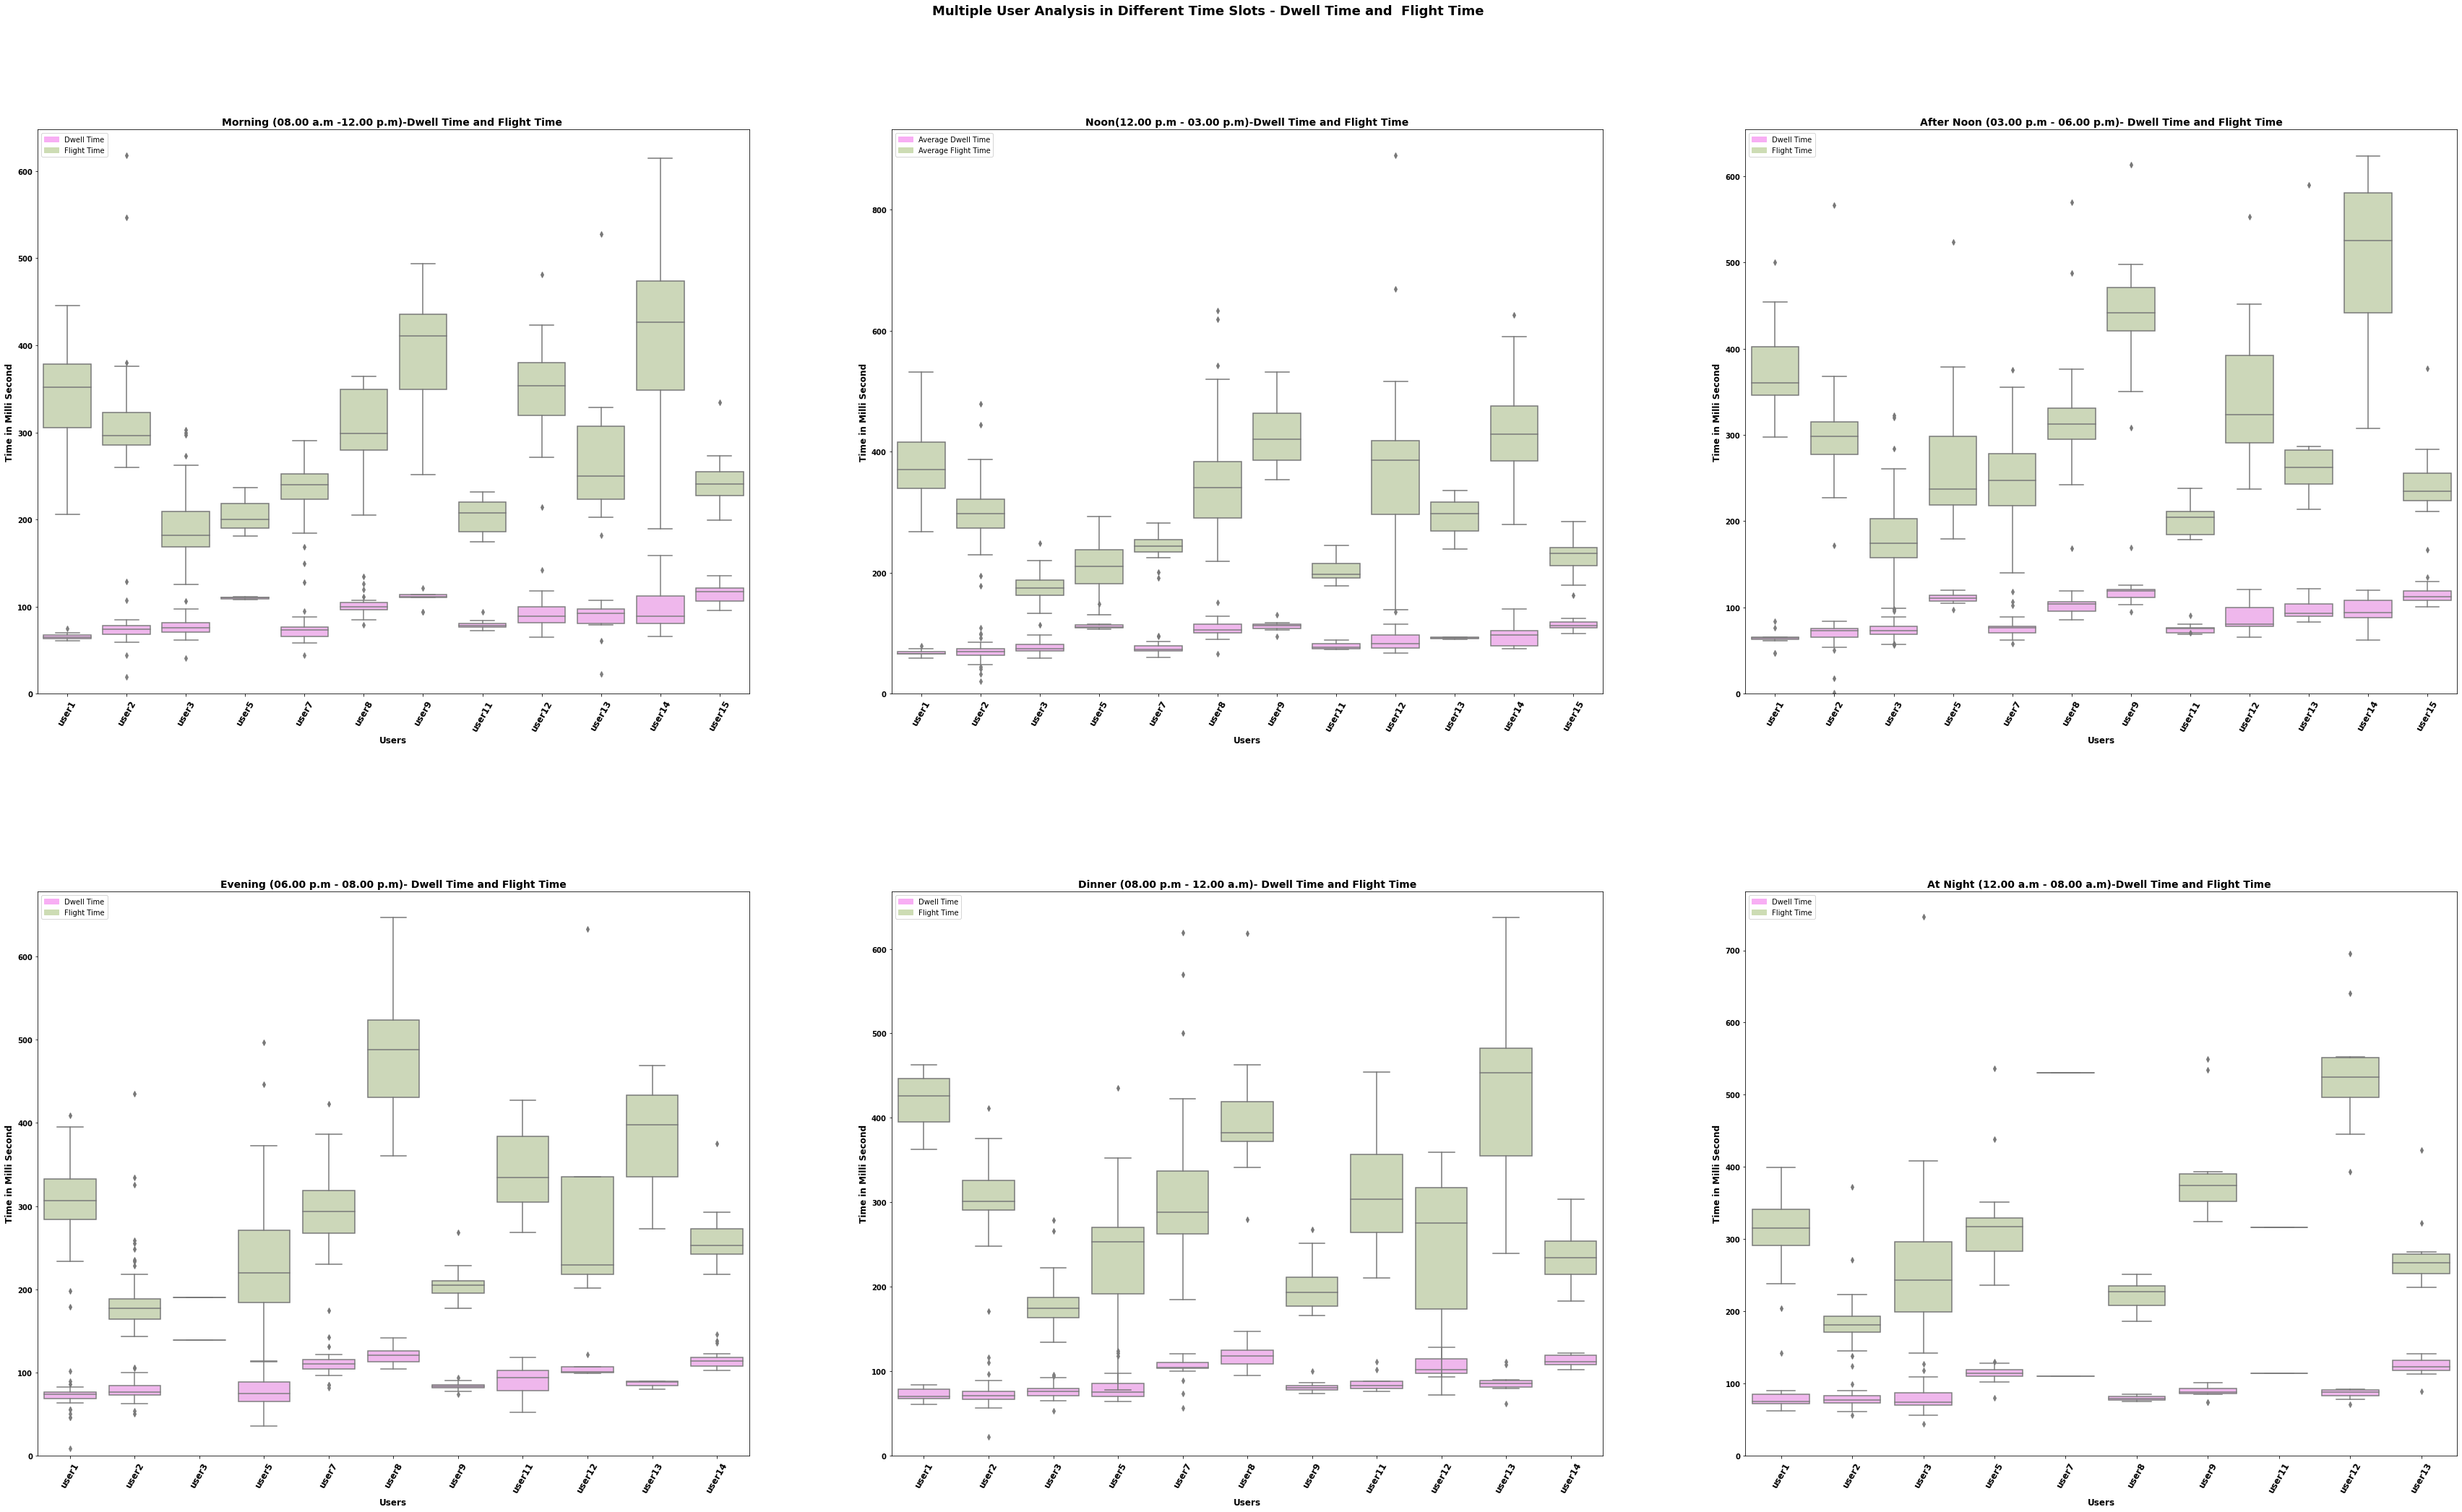

In [ ]:
#Multiple User Analysis in Different Timeslots- Dwell Time Vs Flight Time
fig=plt.figure(figsize=(60,30))
#set a figure title on top 
fig.suptitle('Multiple User Analysis in Different Time Slots - Dwell Time and  Flight Time', fontsize = 18,fontweight='bold');
#to plot x axis in user name asc order
df_event_morning['user_name'] = df_event_morning['user_name'].astype('str') 
df_event_morning['user_name']=df_event_morning['user_name'].str.extract('([0-9]+)').astype(int)
# set the spacing between subplots
plt.subplots_adjust(left=0.125,
                    bottom=0.05, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
#############At Morning #########################################################
plt.subplot(2, 3, 1)#plt.subplot(#rows,#columns,Plot no)
plt.title('Morning (08.00 a.m -12.00 p.m)-Dwell Time and Flight Time ', size = 14,fontweight='bold');
ax1 = sns.boxplot(x="user_name", y="avg_dwell_time",color='#f8aef4', data=df_event_morning)
ax1 = sns.boxplot(x="user_name", y="avg_flight_time",color='#cddcb4', data=df_event_morning)
# Puts x-axis labels on an angle
ax1.xaxis.set_tick_params(rotation = 60) 
ax1.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax1.set_xlabel('Users',size=12,fontweight='bold')
ax1.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax1.set_xticklabels(['user1', 'user2', 'user3','user5','user7','user8','user9','user11','user12','user13','user14','user15'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')

######################################################################################################################################################
#################################At Noon ####################################################
#to plot x axis in user name asc order
df_event_noon['user_name'] = df_event_noon['user_name'].astype('str') 
df_event_noon['user_name']=df_event_noon['user_name'].str.extract('([0-9]+)').astype(int)
plt.subplot(2, 3, 2)#plt.subplot(#rows,#columns,Plot no)
plt.title('Noon(12.00 p.m - 03.00 p.m)-Dwell Time and Flight Time', size = 14,fontweight='bold');
ax2= sns.boxplot(x="user_name", y="avg_dwell_time",color='#f8aef4', data=df_event_noon)
ax2= sns.boxplot(x="user_name", y="avg_flight_time",color='#cddcb4', data=df_event_noon)
# Puts x-axis labels on an angle
ax2.xaxis.set_tick_params(rotation = 60) 
ax2.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Average Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Average Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax2.set_xlabel('Users',size=12,fontweight='bold')
ax2.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax2.set_xticklabels(['user1', 'user2', 'user3','user5','user7','user8','user9','user11','user12','user13','user14','user15'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')

#######################################################################################################################################

################################################At After Noon####################################################################
#to plot x axis in user name asc order
df_event_afternoon['user_name'] = df_event_afternoon['user_name'].astype('str') 
df_event_afternoon['user_name']=df_event_afternoon['user_name'].str.extract('([0-9]+)').astype(int)
plt.subplot(2, 3, 3)#plt.subplot(#rows,#columns,Plot no)
plt.title('After Noon (03.00 p.m - 06.00 p.m)- Dwell Time and Flight Time', size = 14,fontweight='bold');
ax3= sns.boxplot(x="user_name", y="avg_dwell_time",color='#f8aef4', data=df_event_afternoon)
ax3= sns.boxplot(x="user_name", y="avg_flight_time",color='#cddcb4', data=df_event_afternoon)
# Puts x-axis labels on an angle
ax3.xaxis.set_tick_params(rotation = 60) 
ax3.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax3.set_xlabel('Users',size=12,fontweight='bold')
ax3.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax3.set_xticklabels(['user1', 'user2', 'user3','user5','user7','user8','user9','user11','user12','user13','user14','user15'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')


##################################################################################################################################################
#######################################At Evening#################################################################################################
#to plot x axis in user name asc order
df_event_eve['user_name'] = df_event_eve['user_name'].astype('str') 
df_event_eve['user_name']=df_event_eve['user_name'].str.extract('([0-9]+)').astype(int)
plt.subplot(2, 3,4)#plt.subplot(#rows,#columns,Plot no)
plt.title('Evening (06.00 p.m - 08.00 p.m)- Dwell Time and Flight Time', size = 14,fontweight='bold');
ax4= sns.boxplot(x="user_name", y="avg_dwell_time",color='#f8aef4', data=df_event_eve)
ax4= sns.boxplot(x="user_name", y="avg_flight_time",color='#cddcb4', data=df_event_eve)
# Puts x-axis labels on an angle
ax4.xaxis.set_tick_params(rotation = 60) 
ax4.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax4.set_xlabel('Users',size=12,fontweight='bold')
ax4.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax4.set_xticklabels(['user1', 'user2', 'user3','user5','user7','user8','user9','user11','user12','user13','user14','user15'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')

######################################################################################################################################
###########################################At Dinner###############################################################################
#to plot x axis in user name asc order
df_event_dinner['user_name'] = df_event_dinner['user_name'].astype('str') 
df_event_dinner['user_name']=df_event_dinner['user_name'].str.extract('([0-9]+)').astype(int)
plt.subplot(2, 3, 5)#plt.subplot(#rows,#columns,Plot no)
plt.title('Dinner (08.00 p.m - 12.00 a.m)- Dwell Time and Flight Time', size = 14,fontweight='bold');
ax5= sns.boxplot(x="user_name", y="avg_dwell_time",color='#f8aef4', data=df_event_dinner)
ax5= sns.boxplot(x="user_name", y="avg_flight_time",color='#cddcb4', data=df_event_dinner)
# Puts x-axis labels on an angle
ax5.xaxis.set_tick_params(rotation = 60) 
ax5.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax5.set_xlabel('Users',size=12,fontweight='bold')
ax5.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax5.set_xticklabels(['user1', 'user2', 'user3','user5','user7','user8','user9','user11','user12','user13','user14','user15'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')

###########################################################################################################################################################
###################################################At Night###################################################################################################
#to plot x axis in user name asc order
df_event_night['user_name'] = df_event_night['user_name'].astype('str') 
df_event_night['user_name']=df_event_night['user_name'].str.extract('([0-9]+)').astype(int)
plt.subplot(2, 3, 6)#plt.subplot(#rows,#columns,Plot no)
plt.title('At Night (12.00 a.m - 08.00 a.m)-Dwell Time and Flight Time ', size = 14,fontweight='bold');
ax6= sns.boxplot(x="user_name", y="avg_dwell_time",color='#f8aef4', data=df_event_night)
ax6= sns.boxplot(x="user_name", y="avg_flight_time",color='#cddcb4', data=df_event_night)
# Puts x-axis labels on an angle
ax6.xaxis.set_tick_params(rotation = 60) 
ax6.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax6.set_xlabel('Users',size=12,fontweight='bold')
ax6.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax6.set_xticklabels(['user1', 'user2', 'user3','user5','user7','user8','user9','user11','user12','user13','user14','user15'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')


Mulitple Users By Timezone -Different Time Slot

In [ ]:
#group by user name and time slot
df_event_tz_timeslot=df_event.groupby(
     ['event_date','country_code','time_slot'] 
).agg(avg_dwell_time=('dwell_time_ms',np.mean),sd_dwell_time=('dwell_time_ms',np.std),avg_flight_time=('flight_time_ms',np.mean),sd_flight_time=('flight_time_ms',np.std)).reset_index()

df_event_tz_timeslot

In [ ]:
#filter by timeslot= morning
df_event_tz_morning= df_event_tz_timeslot.query('time_slot=="Morning" ').loc[:,:]  #loc will allocate memory for query result
df_event_tz_morning
#filter by timeslot= noon
df_event_tz_noon= df_event_tz_timeslot.query('time_slot=="Noon" ').loc[:,:]  #loc will allocate memory for query result
df_event_tz_noon
#filter by timeslot= afetrnoon
df_event_tz_afternoon= df_event_tz_timeslot.query('time_slot=="After Noon" ').loc[:,:]  #loc will allocate memory for query result
df_event_tz_afternoon
#filter by timeslot= evening
df_event_tz_eve= df_event_tz_timeslot.query('time_slot=="Evening" ').loc[:,:]  #loc will allocate memory for query result
df_event_tz_eve
#filter by timeslot= dinner
df_event_tz_dinner= df_event_tz_timeslot.query('time_slot=="Dinner" ').loc[:,:]  #loc will allocate memory for query result
df_event_tz_dinner
#filter by timeslot= night
df_event_tz_night= df_event_tz_timeslot.query('time_slot=="Night" ').loc[:,:]  #loc will allocate memory for query result
df_event_tz_night

,event_date,country_code,time_slot,avg_dwell_time,sd_dwell_time,avg_flight_time,sd_flight_time
4,01-03-2021,AE,Night,72.533333,30.819762,246.700000,189.459141
17,01-07-2021,AE,Night,90.363636,19.428189,234.636364,269.327040
25,01-07-2021,IN,Night,89.620098,67.618022,235.362745,195.347182
31,01-07-2021,SA,Night,73.935484,19.103116,323.838710,187.834874
43,02-03-2021,AE,Night,72.333333,23.094011,194.000000,60.506198
...,...,...,...,...,...,...,...
934,28-06-2021,IN,Night,101.734531,29.849881,284.291417,225.613268
946,29-06-2021,IE,Night,77.658065,24.757116,298.354839,148.168811
952,29-06-2021,IN,Night,99.287865,33.477259,350.656632,263.806925
962,30-06-2021,AE,Night,108.000000,NaN,238.000000,NaN


(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text major ticklabel objects>)

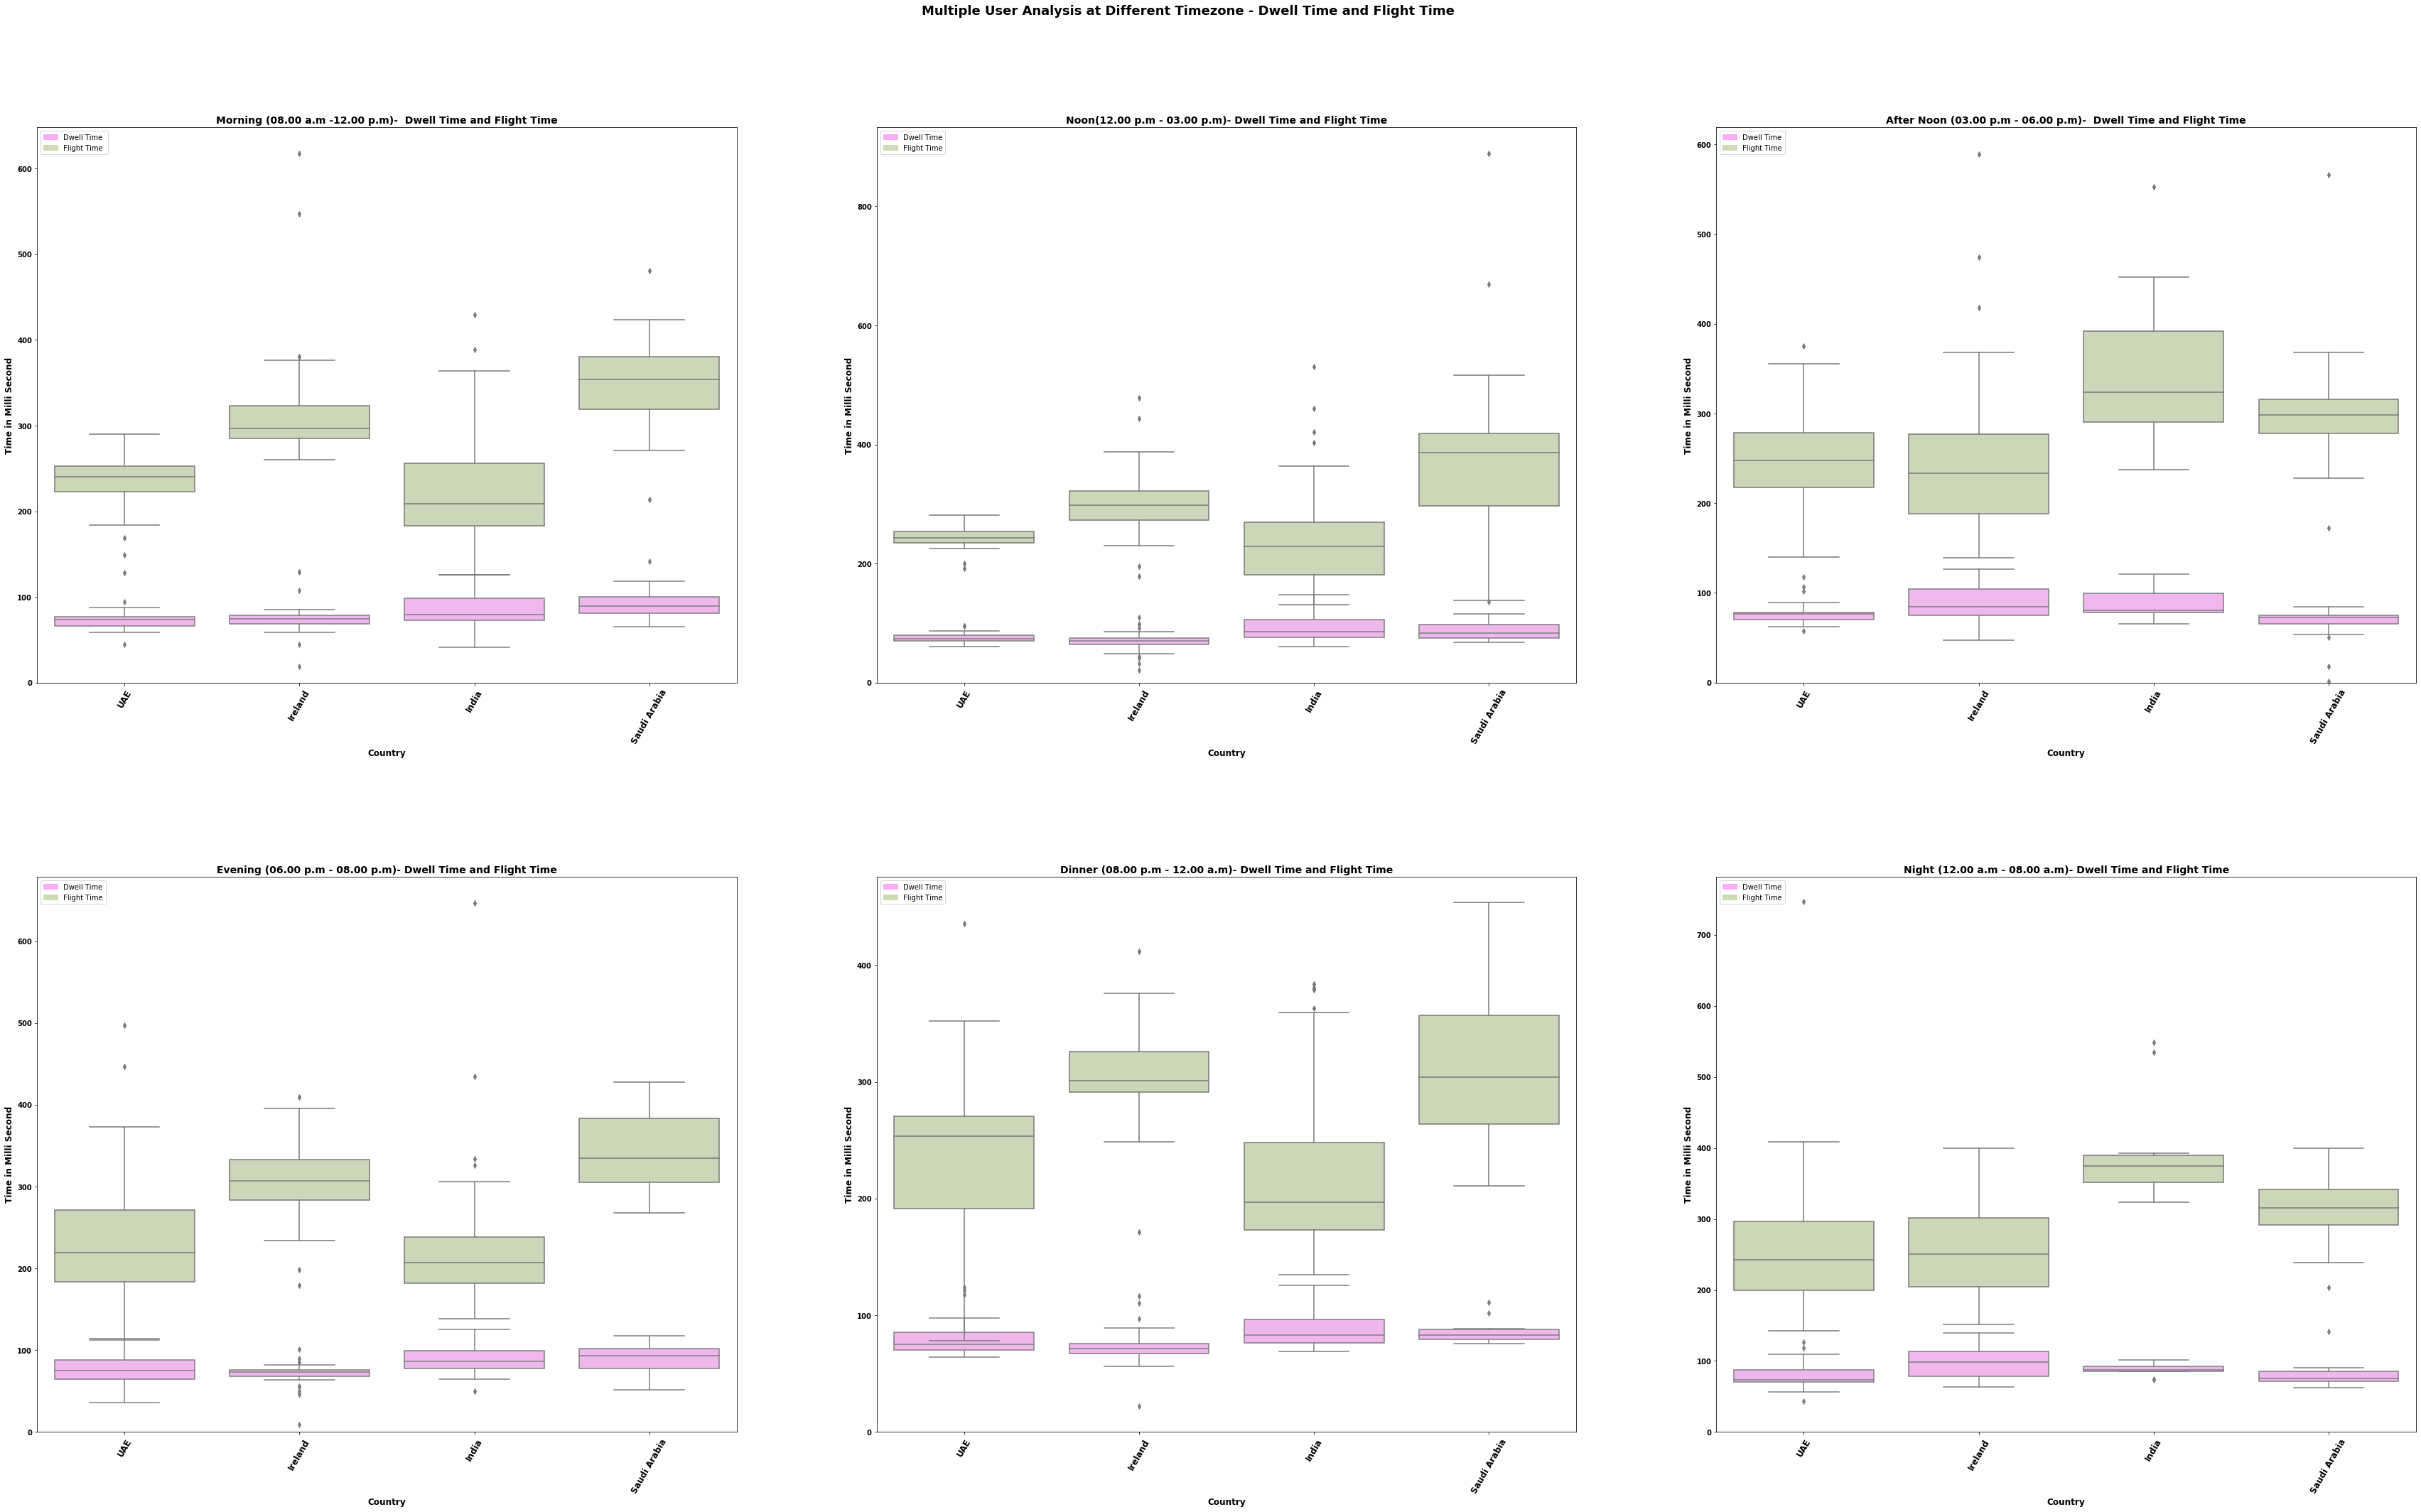

In [ ]:
#Multiple User Analysis at Different  Timezone - Dwell Time Vs Flight Time
fig=plt.figure(figsize=(60,30))
#set a figure title on top 
fig.suptitle('Multiple User Analysis at Different Timezone - Dwell Time and Flight Time', fontsize = 18,fontweight='bold');
# set the spacing between subplots
plt.subplots_adjust(left=0.125,
                    bottom=0.05, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
#############At Morning #########################################################
plt.subplot(2, 3, 1)#plt.subplot(#rows,#columns,Plot no)
plt.title('Morning (08.00 a.m -12.00 p.m)-  Dwell Time and Flight Time', size = 14,fontweight='bold');
ax1 = sns.boxplot(x="country_code", y="avg_dwell_time",color='#f8aef4', data=df_event_tz_morning)
ax1 = sns.boxplot(x="country_code", y="avg_flight_time",color='#cddcb4', data=df_event_tz_morning)
# Puts x-axis labels on an angle
ax1.xaxis.set_tick_params(rotation = 60) 
ax1.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time ')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax1.set_xlabel('Country',size=12,fontweight='bold')
ax1.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax1.set_xticklabels(['UAE', 'Ireland', 'India','Saudi Arabia'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')


######################################################################################################################################################
#################################At Noon ####################################################

plt.subplot(2, 3, 2)#plt.subplot(#rows,#columns,Plot no)
plt.title('Noon(12.00 p.m - 03.00 p.m)- Dwell Time and Flight Time', size = 14,fontweight='bold');
ax2 = sns.boxplot(x="country_code", y="avg_dwell_time",color='#f8aef4', data=df_event_tz_noon)
ax2 = sns.boxplot(x="country_code", y="avg_flight_time",color='#cddcb4', data=df_event_tz_noon)
# Puts x-axis labels on an angle
ax2.xaxis.set_tick_params(rotation = 60) 
ax2.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax2.set_xlabel('Country',size=12,fontweight='bold')
ax2.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax2.set_xticklabels(['UAE', 'Ireland', 'India','Saudi Arabia'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')

#######################################################################################################################################
################################################At After Noon####################################################################

plt.subplot(2, 3, 3)#plt.subplot(#rows,#columns,Plot no)
plt.title('After Noon (03.00 p.m - 06.00 p.m)-  Dwell Time and Flight Time', size = 14,fontweight='bold');
ax3 = sns.boxplot(x="country_code", y="avg_dwell_time",color='#f8aef4', data=df_event_tz_afternoon)
ax3 = sns.boxplot(x="country_code", y="avg_flight_time",color='#cddcb4', data=df_event_tz_afternoon)
# Puts x-axis labels on an angle
ax3.xaxis.set_tick_params(rotation = 60) 
ax3.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax3.set_xlabel('Country',size=12,fontweight='bold')
ax3.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax3.set_xticklabels(['UAE', 'Ireland', 'India','Saudi Arabia'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')

##################################################################################################################################################
#######################################At Evening#################################################################################################

plt.subplot(2, 3, 4)#plt.subplot(#rows,#columns,Plot no)
plt.title('Evening (06.00 p.m - 08.00 p.m)- Dwell Time and Flight Time', size = 14,fontweight='bold');
ax4 = sns.boxplot(x="country_code", y="avg_dwell_time",color='#f8aef4', data=df_event_tz_eve)
ax4 = sns.boxplot(x="country_code", y="avg_flight_time",color='#cddcb4', data=df_event_tz_eve)
# Puts x-axis labels on an angle
ax4.xaxis.set_tick_params(rotation = 60) 
ax4.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax4.set_xlabel('Country',size=12,fontweight='bold')
ax4.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax4.set_xticklabels(['UAE', 'Ireland', 'India','Saudi Arabia'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')
######################################################################################################################################
###########################################At Dinner###############################################################################

plt.subplot(2, 3, 5)#plt.subplot(#rows,#columns,Plot no)
plt.title('Dinner (08.00 p.m - 12.00 a.m)- Dwell Time and Flight Time', size = 14,fontweight='bold');
ax5 = sns.boxplot(x="country_code", y="avg_dwell_time",color='#f8aef4', data=df_event_tz_dinner)
ax5 = sns.boxplot(x="country_code", y="avg_flight_time",color='#cddcb4', data=df_event_tz_dinner)
# Puts x-axis labels on an angle
ax5.xaxis.set_tick_params(rotation = 60) 
ax5.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax5.set_xlabel('Country',size=12,fontweight='bold')
ax5.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax5.set_xticklabels(['UAE', 'Ireland', 'India','Saudi Arabia'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')

###########################################################################################################################################################
###################################################At Night###################################################################################################


plt.subplot(2, 3, 6)#plt.subplot(#rows,#columns,Plot no)
plt.title('Night (12.00 a.m - 08.00 a.m)- Dwell Time and Flight Time', size = 14,fontweight='bold');
ax6 = sns.boxplot(x="country_code", y="avg_dwell_time",color='#f8aef4', data=df_event_tz_night)
ax6 = sns.boxplot(x="country_code", y="avg_flight_time",color='#cddcb4', data=df_event_tz_night)
# Puts x-axis labels on an angle
ax6.xaxis.set_tick_params(rotation = 60) 
ax6.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left')
ax6.set_xlabel('Country',size=12,fontweight='bold')
ax6.set_ylabel('Time in Milli Second',size=12,fontweight='bold')
#print(plt.xticks())
ax6.set_xticklabels(['UAE', 'Ireland', 'India','Saudi Arabia'],{'fontsize': 12,'fontweight': 'bold'})
plt.yticks(size=10,fontweight='bold')
